In [270]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import random

%matplotlib inline

In [271]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/oil_spill.csv")
data = np.array(data)
x = data[:,:15]
y = data[:,49]

In [273]:
def crearDatosSinteticos():
  global x
  global y
  x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
  for i in range (9300):
    x1 = np.append(x1, (round(random.uniform(1,204),2)))
    x2 = np.append(x2, (round(random.uniform(1, 10),2)))
    x3 = np.append(x3, (round(random.uniform(1, 1000),2)))
    x4 = np.append(x4, (round(random.uniform(1, 500),2)))
    x5 = np.append(x5, (round(random.uniform(1, 400),2)))
    x6 = np.append(x6, (round(random.uniform(1, 1000),2)))
    x7 = np.append(x7, (round(random.uniform(1, 500),2)))
    x8 = np.append(x8, (round(random.uniform(1, 450),2)))
    x9 = np.append(x9, (round(random.uniform(1, 600),2)))
    x10 = np.append(x10, (round(random.uniform(1, 750),2)))
    x11 = np.append(x11, (round(random.uniform(1, 200),2)))
    x12 = np.append(x12, (round(random.uniform(1, 1450),2)))
    x13 = np.append(x13, (round(random.uniform(1, 450),2)))
    x14 = np.append(x14, (round(random.uniform(1, 2500),2)))
    x15 = np.append(x15, (round(random.uniform(1, 200),2)))
    y = np.append(y, random.randrange(0, 2))
  xSintetico = np.column_stack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15))
  x = np.concatenate((x, xSintetico), axis=0)

In [274]:
crearDatosSinteticos()
n_ejemplos = y.shape[0]
print(x.shape)

(10237, 15)


In [275]:
def normalizarX(x):
  x_normalizada = []
  promedio = np.mean(x,axis=0)
  x = x.astype(float)
  desviacion_estandar = np.std(x,axis=0)
  for i in range(n_ejemplos):
    caracteristicas_x = []
    for j in range(x.shape[1]):
      if desviacion_estandar[j] != 0:
        caracteristicas_x.append((x[i,j]-promedio[j])/desviacion_estandar[j])
      else:
        caracteristicas_x.append(0)
    x_normalizada.append(caracteristicas_x)
  return x_normalizada, promedio, desviacion_estandar

In [276]:
x_normalizada, promedio, desviacion_estandar = normalizarX(x)
x_normalizada = np.array(x_normalizada)

In [277]:
def funcionSigmoidea(z):
  z = np.array(z)
  g = 1/(1+np.exp(-z))
  return g

In [278]:
x = np.concatenate((np.ones([n_ejemplos,1]),x_normalizada),axis=1)

In [279]:
def calcularCosto(theta, x, y):
  h = funcionSigmoidea(x.dot(theta.T))
  J = (1/n_ejemplos)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
  return J

In [280]:
def descensoGradiente(x, y, theta, alpha, n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range (n_iteraciones):
    h = funcionSigmoidea(x.dot(theta.T))
    theta = theta-(alpha/n_ejemplos)*(h-y).dot(x)
    historial_J.append(calcularCosto(theta,x,y))
  return theta, historial_J

In [287]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 5000
  alpha = 0.0001
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [288]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [-0.01721653 -0.00276707 -0.00655449 -0.00866266 -0.03581024  0.012949
 -0.00776198  0.02239277  0.02593793 -0.01880832  0.02912008 -0.00246726
  0.02425266  0.02524533  0.02214978  0.02672614]
El menor costo que se pudo determinar fue de:  0.6795049342963201


Text(0, 0.5, 'Costo J')

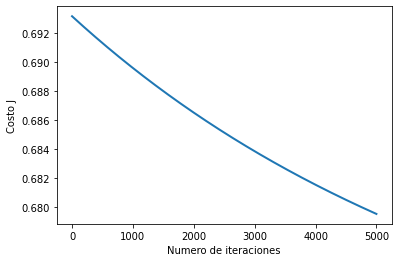

In [289]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [284]:
def normalizarXPredecir(x):
  x = np.array(x)
  caracteristicas_x_predecir = []
  for i in range (x.shape[0]):
    if desviacion_estandar[i] != 0:
      caracteristicas_x_predecir.append((x[i]-promedio[i])/desviacion_estandar[i])
    else:
      caracteristicas_x_predecir.append(0)
  return caracteristicas_x_predecir

In [285]:
def predecir(x):
  x = np.array(x)
  x = normalizarXPredecir(x)
  x = np.concatenate((np.ones(1),x))
  y_predecir = funcionSigmoidea(np.dot(x,theta))
  print("El porcentaje de los valores de x para tener un derrame de aceite es ",y_predecir*100)

In [286]:
predecir([1,2558,1506.09,456.63,90,5,14,5,25,63,12,20,33,154,1])

El porcentaje de los valores de x para tener un derrame de aceite es  48.0966625409347
